In [1]:
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv("c:/data/pima/data.csv")
df2 = df[['target', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
model = smf.ols(formula='target ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6', data=df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.507    
Dependent Variable: target           AIC:                4793.9848
Date:               2022-02-09 10:15 BIC:                4838.9892
No. Observations:   442              Log-Likelihood:     -2386.0  
Df Model:           10               F-statistic:        46.27    
Df Residuals:       431              Prob (F-statistic): 3.83e-62 
R-squared:          0.518            Scale:              2932.7   
------------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025     0.975] 
------------------------------------------------------------------
Intercept    152.1335   2.5759 59.0614 0.0000   147.0707  157.1963
age          -10.0122  59.7492 -0.1676 0.8670  -127.4482  107.4238
sex         -239.8191  61.2223 -3.9172 0.0001  -360.1505 -119.4876
bmi          519.8398  66.5336  7.8132 0.0000   389.0692  650.6104
bp           324.3904  65.4219  4.9584 0.0000   195.8047  452.9762
s1          -792.1841 416.6839 -1.9012 0.0579 -1611.1694   26.8012
s2           476.7458 339.0345  1.4062 0.1604  -189.6209 1143.1125
s3           101.0446 212.5326  0.4754 0.6347  -316.6847  518.7738
s4           177.0642 161.4756  1.0965 0.2735  -140.3135  494.4418
s5           751.2793 171.9020  4.3704 0.0000   413.4088 1089.1498
s6            67.6254  65.9842  1.0249 0.3060   -62.0655  197.3163
------------------------------------------------------------------
Omnibus:               1.506        Durbin-Watson:           2.029
Prob(Omnibus):         0.471        Jarque-Bera (JB):        1.404
Skew:                  0.017        Prob(JB):                0.496
Kurtosis:              2.726        Condition No.:           227  
==================================================================

"""

In [ ]:
# 4번

In [9]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("c:/data/titanic/train3.csv")

train_cols = df.columns[1:]
X = df[train_cols]
y = df["Survived"]

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Survived"])

df2 = pd.concat([X_samp, y_samp], axis=1)

train_cols = df2.columns[0:9]
X = X_samp[train_cols]
y = y_samp["Survived"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.7879341864716636
검증용:  0.7737226277372263


<AxesSubplot:>

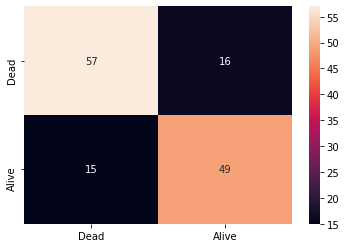

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=["Dead", "Alive"], columns=["Dead", "Alive"])
sns.heatmap(df_cm, annot=True)

In [ ]:
# 6번 keras 신경망 이용해서 손글씨 데이터셋 분석

In [1]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32')/255.0
X_test = X_test.reshape(10000, 784).astype('float32')/255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_val = X_train[:12600]
x_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

model = Sequential()
model.add(Dense(units=512, input_dim=28*28, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [2]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1482/1482 [==============================] - 6s 3ms/step - loss: 0.6672 - accuracy: 0.8423 - val_loss: 0.3803 - val_accuracy: 0.8974
Epoch 2/5
1482/1482 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.9044 - val_loss: 0.3102 - val_accuracy: 0.9135
Epoch 3/5
1482/1482 [==============================] - 5s 3ms/step - loss: 0.2967 - accuracy: 0.9174 - val_loss: 0.2759 - val_accuracy: 0.9246
Epoch 4/5
1482/1482 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9262 - val_loss: 0.2541 - val_accuracy: 0.9296
Epoch 5/5
1482/1482 [==============================] - 5s 4ms/step - loss: 0.2429 - accuracy: 0.9324 - val_loss: 0.2356 - val_accuracy: 0.9356


In [3]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print("loss_and_metrics: "+str(loss_and_metrics))

loss_and_metrics: [0.22701816260814667, 0.9375]


In [ ]:
# keras 신경망을 이용해서 로이터 뉴스 데이터셋의 뉴스 카테고리 분류

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
len(train_data)

2121728/2110848 [==============================] - 0s 0us/step


8982

In [2]:
len(test_data)

2246

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

565248/550378 [==============================] - 0s 0us/step


In [4]:
import numpy as np
np.random.seed(5)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/5
16/16 [==============================] - 1s 38ms/step - loss: 2.5422 - accuracy: 0.5098 - val_loss: 1.6958 - val_accuracy: 0.6620
Epoch 2/5
16/16 [==============================] - 0s 26ms/step - loss: 1.3649 - accuracy: 0.7181 - val_loss: 1.2756 - val_accuracy: 0.7180
Epoch 3/5
16/16 [==============================] - 0s 26ms/step - loss: 1.0154 - accuracy: 0.7859 - val_loss: 1.1064 - val_accuracy: 0.7720
Epoch 4/5
16/16 [==============================] - 0s 27ms/step - loss: 0.7883 - accuracy: 0.8399 - val_loss: 1.0249 - val_accuracy: 0.7790
Epoch 5/5
71/71 [==============================] - 0s 2ms/step - loss: 1.0283 - accuracy: 0.7752


In [10]:
results

[1.0283464193344116, 0.7751558423042297]

In [11]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

3

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

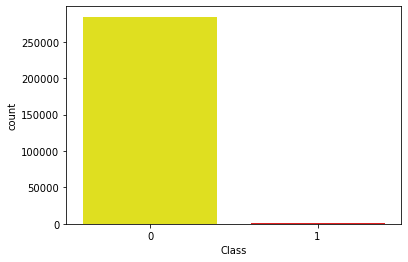

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("c:/data/creditcard/creditcard.csv")
colors = ["yellow", "red"]
sns.countplot("Class", data=df, palette=colors)

In [2]:
train_cols = df.columns[1:29]
X = df[train_cols]
y = df["Class"]

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

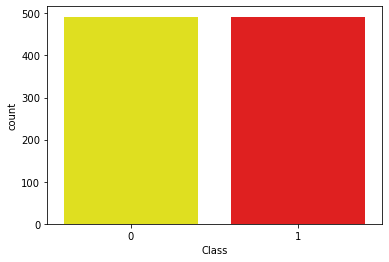

In [3]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Class"])
df2 = pd.concat([X_samp, y_samp], axis=1)
sns.countplot("Class", data=df2, palette=colors)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

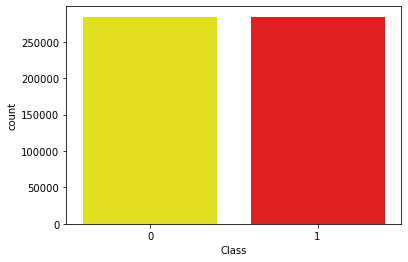

In [4]:
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Class"])
df2 = pd.concat([X_samp, y_samp], axis=1)
sns.countplot("Class", data=df2, palette=colors)